<a href="https://colab.research.google.com/github/cwf2/style_2025/blob/main/Example_1d_speech_length_in_Iliad_and_Dionysiaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install DICES client software

This step is only necessary once on most machines, but because Google Colab runs this notebook on a fresh virtual machine every time, we always need to install DICES as the first step.

In [ ]:
!pip install -q git+https://github.com/cwf2/dices-client

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 697.1/697.1 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 26.0 MB/s 

### Import statements

This tells Python which ancillary functions we want to use in this notebook.

In [ ]:
from dicesapi import DicesAPI
from dicesapi.text import CtsAPI
import pandas as pd

### Initialize connection to external sources

This creates connections to the speech database and to the digital library.

In [ ]:
# DICES database
api = DicesAPI(logdetail = 0)

# Perseus Digital Library
cts = CtsAPI(dices_api = api)

[GENE]Database Initialized

### Get some speeches

This is the basic search function to get speeches from DICES according to specific parameters.

In [ ]:
speeches = sorted(
    api.getSpeeches(work_title = "Iliad") +
    api.getSpeeches(work_title = "Dionysiaca")
)

n = len(speeches)

print(f"Retrieved {n} speeches")

Retrieved 1052 speeches


### Print out some basic information about the speeches

This loops over each speech in turn and prints out its attributes, separated by a tab.


In [ ]:
for speech in speeches:
    print(speech.id, speech.author.name, speech.work.title, speech.l_fi, speech.l_la, speech.getSpkrString(), speech.getAddrString(), sep="\t")

1	Homer	Iliad	1.17	1.21	Chryses	Agamemnon, Greeks
2	Homer	Iliad	1.26	1.32	Agamemnon	Chryses
3	Homer	Iliad	1.37	1.42	Chryses	Apollo
4	Homer	Iliad	1.59	1.67	Achilles	Agamemnon
5	Homer	Iliad	1.74	1.83	Calchas	Achilles
6	Homer	Iliad	1.85	1.91	Achilles	Calchas
7	Homer	Iliad	1.93	1.100	Calchas	Achilles
8	Homer	Iliad	1.106	1.120	Agamemnon	Calchas
9	Homer	Iliad	1.122	1.129	Achilles	Agamemnon
10	Homer	Iliad	1.131	1.147	Agamemnon	Achilles
11	Homer	Iliad	1.149	1.171	Achilles	Agamemnon
12	Homer	Iliad	1.173	1.187	Agamemnon	Achilles
13	Homer	Iliad	1.202	1.205	Achilles	Athena
14	Homer	Iliad	1.207	1.214	Athena	Achilles
15	Homer	Iliad	1.216	1.218	Achilles	Athena
16	Homer	Iliad	1.225	1.244	Achilles	Agamemnon
17	Homer	Iliad	1.254	1.284	Nestor	Achilles, Agamemnon
18	Homer	Iliad	1.286	1.291	Agamemnon	Nestor
19	Homer	Iliad	1.293	1.303	Achilles	Agamemnon
20	Homer	Iliad	1.322	1.325	Agamemnon	Eurybates, Talthybius
21	Homer	Iliad	1.334	1.344	Achilles	Eurybates, Patroclus, Talthybius
22	Homer	Iliad	1.352	1.356	A

### Extract book and line numbers from the loci

The loci are recorded as *strings*, that is, sequences of characters rather than as numeric data. Here we split each locus into two parts based on the "." character, and convert each part to a number (integer or `int`).

At this point, we don't need to print the names of the speakers and addressees, so we'll leave that out.

In [ ]:
for speech in speeches:
    loc_first = speech.l_fi
    loc_last = speech.l_la

    book_first, line_first = loc_first.split(".")
    book_last, line_last = loc_last.split(".")

    print(speech.id, speech.author.name, speech.work.title, book_first, line_first, line_last, sep="\t")

1	Homer	Iliad	1	17	21
2	Homer	Iliad	1	26	32
3	Homer	Iliad	1	37	42
4	Homer	Iliad	1	59	67
5	Homer	Iliad	1	74	83
6	Homer	Iliad	1	85	91
7	Homer	Iliad	1	93	100
8	Homer	Iliad	1	106	120
9	Homer	Iliad	1	122	129
10	Homer	Iliad	1	131	147
11	Homer	Iliad	1	149	171
12	Homer	Iliad	1	173	187
13	Homer	Iliad	1	202	205
14	Homer	Iliad	1	207	214
15	Homer	Iliad	1	216	218
16	Homer	Iliad	1	225	244
17	Homer	Iliad	1	254	284
18	Homer	Iliad	1	286	291
19	Homer	Iliad	1	293	303
20	Homer	Iliad	1	322	325
21	Homer	Iliad	1	334	344
22	Homer	Iliad	1	352	356
23	Homer	Iliad	1	362	363
24	Homer	Iliad	1	365	412
25	Homer	Iliad	1	414	427
26	Homer	Iliad	1	442	445
27	Homer	Iliad	1	451	456
28	Homer	Iliad	1	503	510
29	Homer	Iliad	1	514	516
30	Homer	Iliad	1	518	527
31	Homer	Iliad	1	540	543
32	Homer	Iliad	1	545	550
33	Homer	Iliad	1	552	559
34	Homer	Iliad	1	561	567
35	Homer	Iliad	1	573	583
36	Homer	Iliad	1	586	594
37	Homer	Iliad	2	8	15
38	Homer	Iliad	2	23	34
39	Homer	Iliad	2	56	75
40	Homer	Iliad	2	60	70
41	Homer	Iliad	2	79	83
42	Homer

### Putting it all together

### Make a table

Python can work with tabular data like a spreadsheet with the help of the ancillary package Pandas. Here we make the same data into a Pandas DataTable.

Here, we also calculate the length of the speeches we've retrieved.

In [ ]:
# an empty list to hold the rows
rows = list()

# iterate over the speeches
for speech in speeches:
    # separate book and line numbers
    book_first, line_first = speech.l_fi.split(".")
    book_last, line_last = speech.l_la.split(".")

    # calculate length of speech
    nlines = int(line_last) - int(line_first) + 1

    # create a new row, labelling all the data values
    row = {
        "id": speech.id,
        "author": speech.author.name,
        "work": speech.work.title,
        "book": int(book_first),
        "first_line": line_first,
        "last_line": line_last,
        "num_lines": nlines,
        }

    # add the row to the list
    rows.append(row)

# make the table
table = pd.DataFrame(rows)

# display the table
display(table)

,id,author,work,book,first_line,last_line,num_lines
0,1,Homer,Iliad,1,17,21,5
1,2,Homer,Iliad,1,26,32,7
2,3,Homer,Iliad,1,37,42,6
3,4,Homer,Iliad,1,59,67,9
4,5,Homer,Iliad,1,74,83,10
...,...,...,...,...,...,...,...
1047,3668,Nonnus,Dionysiaca,48,814,826,13
1048,3669,Nonnus,Dionysiaca,48,832,847,16
1049,3670,Nonnus,Dionysiaca,48,858,864,7
1050,3671,Nonnus,Dionysiaca,48,870,886,17


### Summarize data

Just like in Excel, we can summarize tabular data with a pivot table (draaitabel). In this example, we don't need to include all the data we've gathered about speeches in the *Iliad* and the *Dionysiaca*. Right now, we're only interested in the (average) length of the speeches.

We need to specify which columns in the original table we want to use:
- The rows ("group by") of our summary table will come from `work`. Each work gets one row in the new table.
- Under "agg", we can add in the columns we want. We can also specify how we want the values in the columns to be represented, e.g. as a sum or an average (mean). We tell Python this using the `aggfunc` ("aggregation function") parameter.
- We get the data for the columns from different sources. For number of speeches, that's "id", for number of lines and average number of lines per speech, that's "num_lines".



In [ ]:
HN_speeches = (
    table
    .groupby("work")
    .agg(
        speeches = ("id", "count"),
        lines = ("num_lines", "sum"),
        average_length = ("num_lines", "mean")
    )
    .sort_values("speeches", ascending=True)
)
display(HN_speeches)

,speeches,lines,average_length
work,,,
Dionysiaca,354,7928,22.395480
Iliad,698,7129,10.213467


### Make a graph

Pandas has some basic visualization functions built in. Let's turn the summary table above into a bar graph.

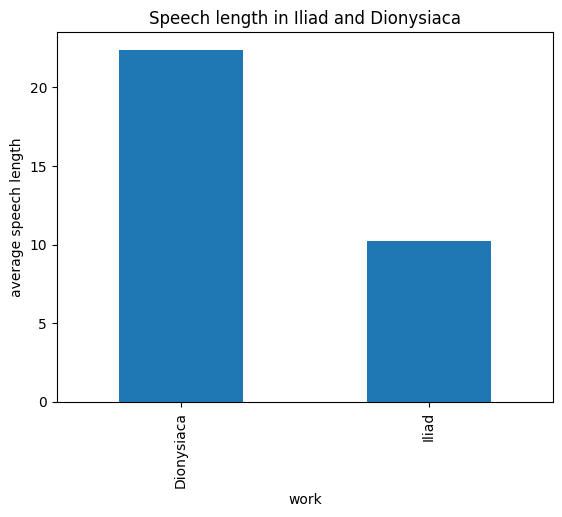

In [ ]:
# generate a bar graph
plot_by_work = HN_speeches["average_length"].plot.bar(title="Speech length in Iliad and Dionysiaca", ylabel="average speech length")

# save to an image file
plot_by_work.figure.savefig("HN_speeches.png")

# Change up the data in the pivot table

If you want to compare average speech length per book, you can shuffle around the data you put in your pivot table.

The "unstack" function splits the "average_length" column into two halves, one for each work.



In [ ]:
HN_per_book = (
    table
    .groupby(["book", "work"])
    .agg(
        average_length = ("num_lines", "mean")
    )
    .unstack()
)

display(HN_per_book)

average_length           
work     Dionysiaca      Iliad
book                          
1         23.250000  10.361111
2         41.428571  15.050000
3         39.500000   8.642857
4         23.875000   8.785714
5         31.600000   8.564103
6         13.750000  12.615385
7         27.800000   8.821429
8         25.500000  10.346154
9         24.000000  32.944444
10        20.000000   7.121951
11        30.916667  10.928571
12        30.750000  10.500000
13         6.000000   9.407407
14        11.333333   8.821429
15        11.272727   8.588235
16        19.461538  10.153846
17        17.500000   7.852941
18        29.600000  10.640000
19        17.875000  13.000000
20        21.222222  10.904762
21        12.428571   8.709677
22        14.000000   9.965517
23        23.800000   8.090909
24        24.800000   9.617021
25        13.500000        NaN
26        19.500000        NaN
27        62.000000        NaN
28         7.000000        NaN
29        18.000000        NaN
30        13.375000        NaN
31        32.000000        NaN
32         9.200000        NaN
33        17.200000        NaN
34        15.100000        NaN
35        27.285714        NaN
36        22.833333        NaN
37         8.937500        NaN
38        65.714286        NaN
39        26.000000        NaN
40        30.714286        NaN
41        16.000000        NaN
42        17.133333        NaN
43        36.500000        NaN
44        30.800000        NaN
45        24.750000        NaN
46        25.000000        NaN
47        25.800000        NaN
48        12.481481        NaN

# Turn new data into graph

To visualize the data as best as we can, we need to adjust the size of the graph using "figsize".



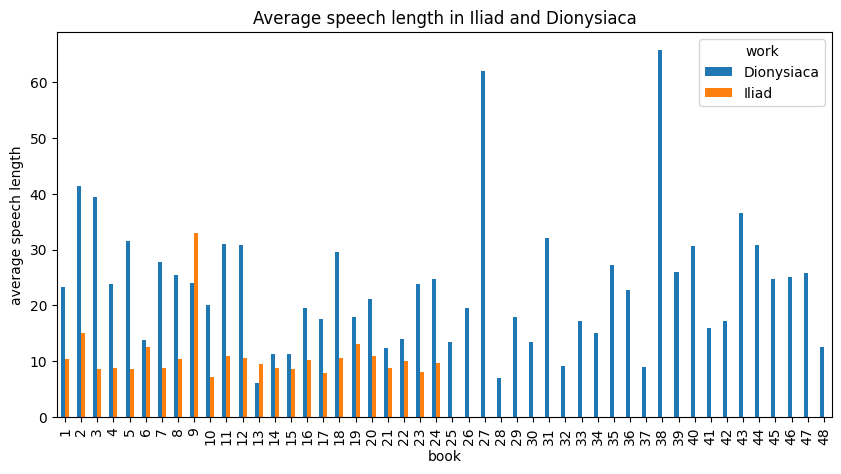

In [ ]:
# generate a bar graph
plot_by_work = HN_per_book["average_length"].plot.bar(title="Average speech length in Iliad and Dionysiaca", ylabel="average speech length", figsize=(10,5))

# save to an image file
plot_by_work.figure.savefig("HN_per_book.png")